Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
import numpy as np
import librosa
import librosa.display

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Folder names

In [ ]:
folder_names=["pot_holes","regular_road","road_humps","wornout_road"]

Column names and no of dataset in each files

In [ ]:
columns_name=["time","acc-x","acc-y","acc-z","gyro-x","gyro-y","gyro-z","mag-x","mag-y","mag-z","speed","lat","lng"]
no_of_data_items={"pot_holes":71,"regular_road":291,"road_humps":120,"wornout_road":186}

function to read a file

In [ ]:
def read_file(filename): 
  df3=pd.read_csv(filename,names=columns_name)
  df3=df3.dropna()
  df3=df3.reset_index(drop=True)
  return df3

reading files for visually representing

In [ ]:
folder_dict={}
for i in folder_names:
  l=[]
  for j in range(1,no_of_data_items[i]+1):
    k=read_file("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    k=k["acc-z"].values.flatten()
    l.append(np.array(k).astype('float32'))
  folder_dict[i]=l

Plotting figures

In [ ]:
plt.figure(figsize=(14,5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

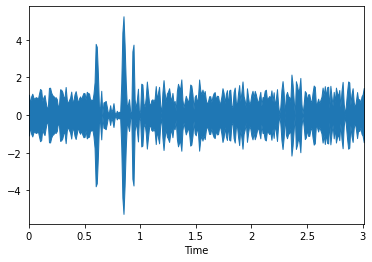

In [ ]:
librosa.display.waveplot(folder_dict["road_humps"][4],sr=100)

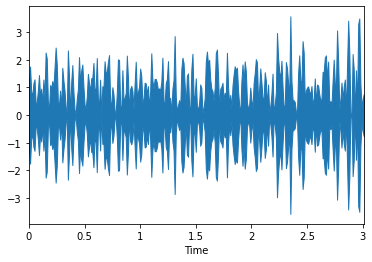

In [ ]:
librosa.display.waveplot(folder_dict["wornout_road"][4],sr=100)

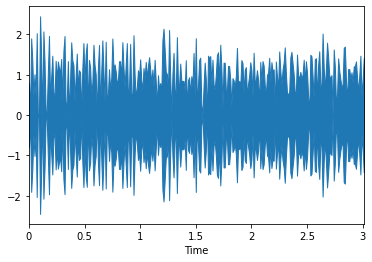

In [ ]:
librosa.display.waveplot(folder_dict["regular_road"][7],sr=100)

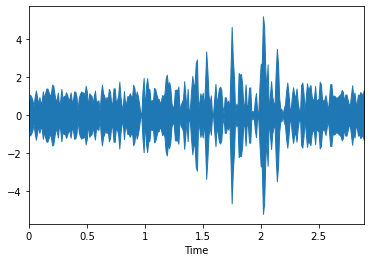

In [ ]:
librosa.display.waveplot(folder_dict["pot_holes"][13],sr=100)

function to read and normalise the data

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
def feature_extractor(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_noise(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=noise(k)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_stretch(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=stretch(k)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_pitch(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=pitch(k,100)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_shift(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=shift(k)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_pitch_8(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=pitch(k,100,0.8)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
def feature_extractor_stretch_12(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   k=pitch(k,100,0.6)
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

reading dataset from each file and conerting it to mfcc spectrogram

In [ ]:
extracted_features=[]
for i in folder_names:
  l=[]
  for j in range(1,no_of_data_items[i]+1):
    data=feature_extractor("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_noise("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_pitch("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_pitch_8("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_shift("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_stretch("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])
    data=feature_extractor_stretch_12("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    extracted_features.append([data,i])

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=286
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=358
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=301
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=376
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=375
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

Converting to dataFrame

In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[286.2177516904209, 44.29208883300858, -8.1230...",pot_holes
1,"[285.1249645236427, 45.34031907658956, -9.0062...",pot_holes
2,"[250.7720728065211, 47.70268963717808, -5.9275...",pot_holes
3,"[250.92111261855862, 47.50835468337626, -5.622...",pot_holes
4,"[284.900950746419, 44.67411040627037, -6.07410...",pot_holes


extracting data and lables

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(3340, 100)

In [ ]:
y=np.array(pd.get_dummies(Y))
y.shape

(4676, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(3273, 100)

In [ ]:
Y_test.shape

(1403, 4)

importing requied ML Modules

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]
num_labels

4

CNN model 

In [ ]:
model=Sequential()
## 1st layer
model.add(Dense(100,input_shape=(100,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 2st layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 3rd layer
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 4th layer
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Final CNN Model

In [ ]:
model=Sequential()
## 1st layer
model.add(Dense(100,input_shape=(100,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 2st layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 3rd layer
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model=Sequential()
## 1st layer
model.add(Dense(100,input_shape=(100,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 2st layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 3rd layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 100)               10100     
                                                                 
 activation_64 (Activation)  (None, 100)               0         
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_65 (Dense)            (None, 200)               20200     
                                                                 
 activation_65 (Activation)  (None, 200)               0         
                                                                 
 dropout_50 (Dropout)        (None, 200)               0         
                                                                 
 dense_66 (Dense)            (None, 300)             

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

Training model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs=500
num_batch_size=32
checkpointer1=ModelCheckpoint(filepath="/content/drive/MyDrive/data/trained_model100.hdf5",verbose=1,save_best_only=True)
start = datetime.now()
history=model.fit(X_train,Y_train,batch_size=num_batch_size,epochs=num_epochs, validation_data=(X_test,Y_test), callbacks=[checkpointer1])

duration=datetime.now()-start
print("Training Complete on time:",duration)

Epoch 1/500
100/103 [============================>.] - ETA: 0s - loss: 10.2245 - accuracy: 0.3328
Epoch 1: val_loss improved from inf to 1.14090, saving model to /content/drive/MyDrive/data/trained_model100.hdf5
103/103 [==============================] - 2s 10ms/step - loss: 10.0699 - accuracy: 0.3333 - val_loss: 1.1409 - val_accuracy: 0.5310
Epoch 2/500
 95/103 [==========================>...] - ETA: 0s - loss: 2.2702 - accuracy: 0.4039
Epoch 2: val_loss improved from 1.14090 to 1.03704, saving model to /content/drive/MyDrive/data/trained_model100.hdf5
103/103 [==============================] - 1s 7ms/step - loss: 2.2162 - accuracy: 0.4045 - val_loss: 1.0370 - val_accuracy: 0.6322
Epoch 3/500
100/103 [============================>.] - ETA: 0s - loss: 1.3162 - accuracy: 0.4894
Epoch 3: val_loss improved from 1.03704 to 0.90505, saving model to /content/drive/MyDrive/data/trained_model100.hdf5
103/103 [==============================] - 1s 6ms/step - loss: 1.3131 - accuracy: 0.4913 - val

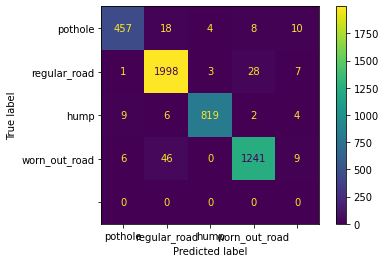

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_true=[]
for i in y:
  pq=4
  if(i[0]==1):
    pq=0
  elif(i[1]==1):
    pq=1
  elif(i[2]==1):
    pq=2
  elif(i[3]==1):
    pq=3
  y_true.append(pq)
y_pred=[]
for i in X:
  pq=4
  i=i.reshape(1,-1)
  if((model.predict(i)>0.5).astype("int32")[0][0]==1):
    pq=0
  elif((model.predict(i)>0.5).astype("int32")[0][1]==1):
    pq=1
  elif((model.predict(i)>0.5).astype("int32")[0][2]==1):
    pq=2
  elif((model.predict(i)>0.5).astype("int32")[0][3]==1):
    pq=3
  y_pred.append(pq)
cm=confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["pothole","regular_road","hump","worn_out_road"])
disp.plot()
plt.show()

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["pothole","regular_road","hump","worn_out_road","not_predictable"])

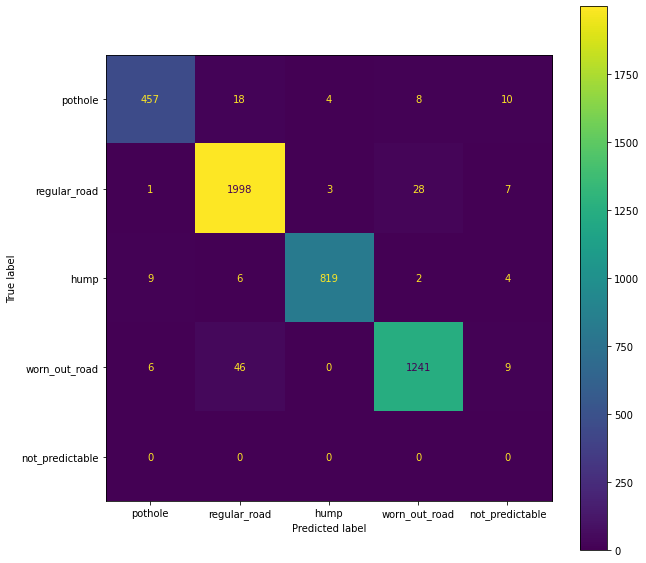

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [ ]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
test_accuracy

[0.8456653356552124, 0.8980755805969238]

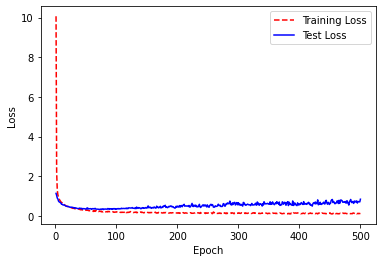

In [ ]:

training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

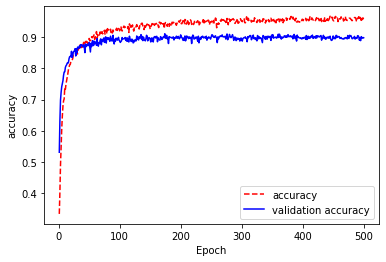

In [ ]:
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['accuracy', 'validation accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

In [ ]:
test_accuracy=model.evaluate(X,y,verbose=0)
test_accuracy

[0.2674832344055176, 0.968349039554596]

In [ ]:
Testing_data=[]
for i in folder_names:
  l=[]
  for j in range(1,no_of_data_items[i]+1):
    data=feature_extractor("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    predected= data.reshape(1,-1)
    Testing_data.append(predected)


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=286
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=301
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=299
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=291
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=292
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

In [ ]:
count=0
for i in Testing_data:
  print(count+1,(model.predict(i)>0.5).astype("int32"))
  count+=1

In [ ]:
segmented_data={}
for i in folder_names:
  l=[]
  for j in range(1,no_of_data_items[i]+1):
    data=feature_extractor("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    predected= data.reshape(1,-1)
    l.append(predected)
  segmented_data[i]=l

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=286
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=301
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=299
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=291
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=292
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

Testing accuracy of each data labels

In [ ]:
count=0
label=0
for i,j in segmented_data.items():
  count=0
  accuracy=0
  for m in j:
    #print(count,i,(model.predict(m)>0.5).astype("int32")[0])
    if((model.predict(m)>0.5).astype("int32")[0][label]==1):
      accuracy+=1
    count+=1
  print(i,"Accuracy is ",accuracy,"/",count,"=",accuracy/count)
  label+=1


pot_holes Accuracy is  70 / 71 = 0.9859154929577465
regular_road Accuracy is  290 / 291 = 0.9965635738831615
road_humps Accuracy is  120 / 120 = 1.0
wornout_road Accuracy is  182 / 186 = 0.978494623655914


In [ ]:
y_true=[]
y_pred=[]
label=0
for i,j in segmented_data.items():
  for m in j:
    y_true.append(label)
    pq=-1
    if((model.predict(m)>0.5).astype("int32")[0][0]==1):
      pq=0
    elif((model.predict(m)>0.5).astype("int32")[0][1]==1):
      pq=1
    elif((model.predict(m)>0.5).astype("int32")[0][2]==1):
      pq=2
    elif((model.predict(m)>0.5).astype("int32")[0][3]==1):
      pq=3
    else:
      pq=4
    y_pred.append(pq)
  label+=1
cm=confusion_matrix(y_true, y_pred)
cm

array([[ 70,   0,   0,   0,   1],
       [  0, 290,   0,   0,   1],
       [  0,   0, 120,   0,   0],
       [  0,   3,   0, 182,   1],
       [  0,   0,   0,   0,   0]])